# **Stable Diffusion**

**Stable Diffusion is a deep learning model for generating images from text descriptions.** 
**Think of it like this: you give it a sentence (a "prompt"), and it creates a picture that matches what you described.**


1. **Diffusion models**

 - They start with random noise (like TV static).
 - Then, step by step, they "denoise" it, slowly shaping it into a meaningful image.
 - The "diffusion" part refers to this process of adding noise and then learning how to remove it.

2. **Latent space**

 - Instead of working directly with giant images (millions of pixels), Stable Diffusion works in a compressed hidden space (called latent space).
 - This makes it faster and more efficient compared to older diffusion models.

3. **"Stable"**

 - The "stable" part comes from Stability AI, the company that developed and open-sourced it in 2022.
 - It also hints that the model is more stable, scalable, and user-friendly than earlier approaches.

4. **Usage**

 - You type: "a cat wearing sunglasses, sitting on the beach in cartoon style".
 - Stable Diffusion converts this text into a detailed image.

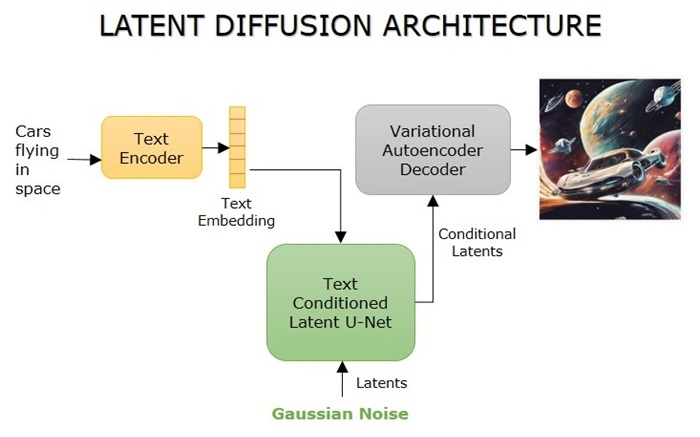

**Let's see one by one practicle to make it easy to understand, how stable diffusion actually work.**

Sentiment Analysis with PipeLine

In [ ]:
# This code uses Hugging Face's transformers pipeline for sentiment analysis.
# It loads a pre-trained model, analyzes the sentiment of a given text,
# and prints whether the text is positive or negative with a confidence score.

from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love using Hugging Face!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9997085928916931}]


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("The food is not good")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9996856451034546}]


Making a UI using Gradio

* lets creates a simple sentiment analysis web app using Gradio and Hugging Face.
* It loads a pre-trained sentiment analysis model, defines a function to analyze text,
* and launches a browser-based interface where users can enter text and see whether
* the sentiment is POSITIVE or NEGATIVE.

In [ ]:
import gradio as gr
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    return classifier(text)[0]["label"]

gr.Interface(fn=analyze_sentiment, inputs="text", outputs="text").launch()

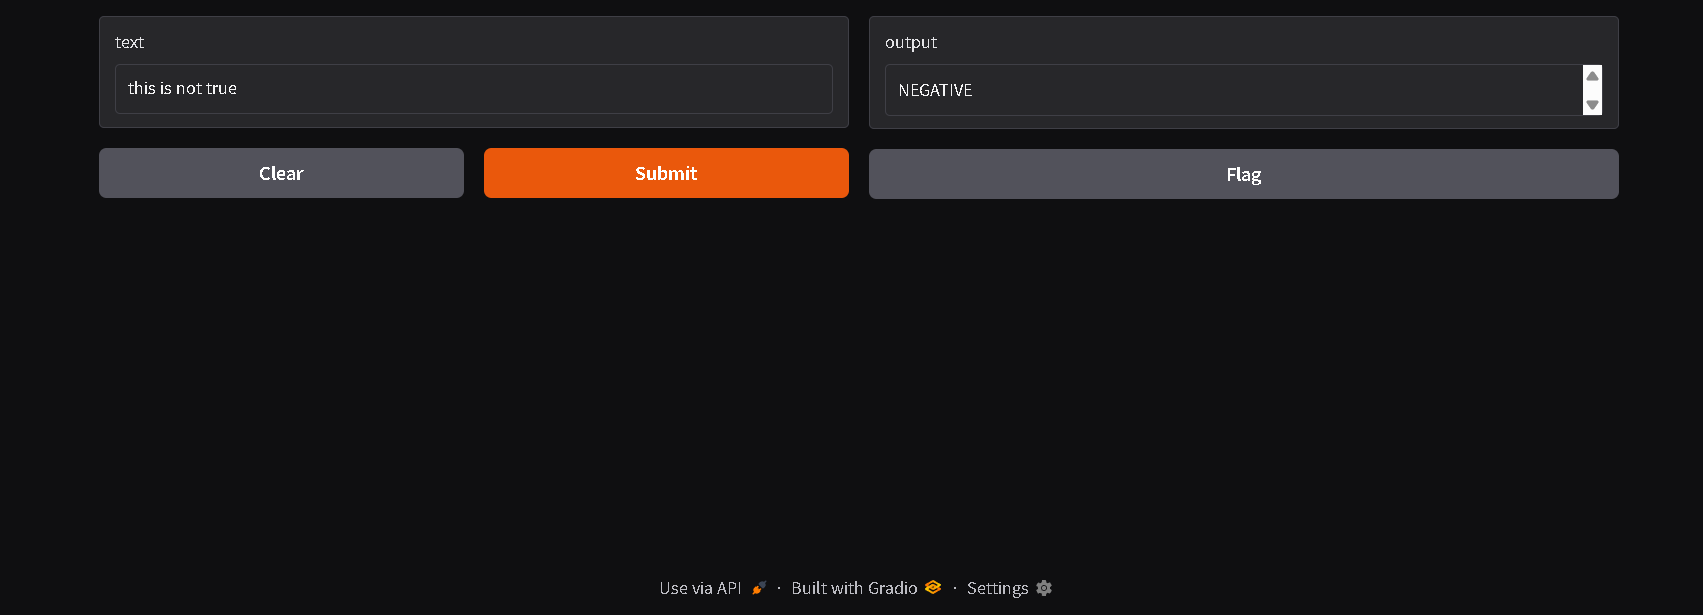

Text to Image Model

In [ ]:
# This code uses Hugging Face's Diffusers library to generate an image with Stable Diffusion v1.5.
# It loads the model, moves it to GPU for faster processing, generates an image from a text prompt,
# and saves the output image as a PNG file.

from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a beautifull girl with blue eys walkig on the road"
image = pipe(prompt).images[0]

image.save("beautifull_girl.png")

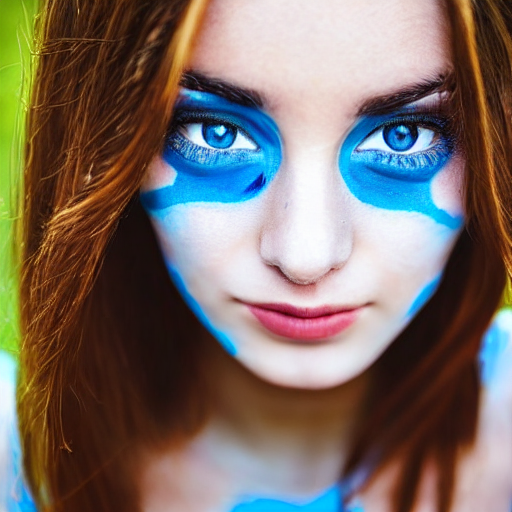

In [ ]:
# Import required libraries: Gradio for UI, Diffusers for Stable Diffusion, and PyTorch for GPU usage
import gradio as gr
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion v1.5 model in half-precision (fp16) and move it to GPU for faster performance
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_auth_token=True  # Add your Hugging Face token if the model is gated
)
pipe = pipe.to("cuda")

# Define a function that takes a text prompt and generates an image using the model
def generate_image(prompt):
    image = pipe(prompt).images[0]
    return image

# Create and launch the Gradio interface: a textbox for input and an image display for output
gr.Interface(
    fn=generate_image,
    inputs=gr.Textbox(label="Enter your prompt", placeholder="e.g. a beautiful girl with blue eyes walking on the road"),
    outputs=gr.Image(type="pil", label="Generated Image"),
    title="🧠 Text-to-Image Generator with Stable Diffusion",
    description="Type a description and generate an image using Stable Diffusion v1.5"
).launch()


![text to image.png](<attachment:text to image.png>)
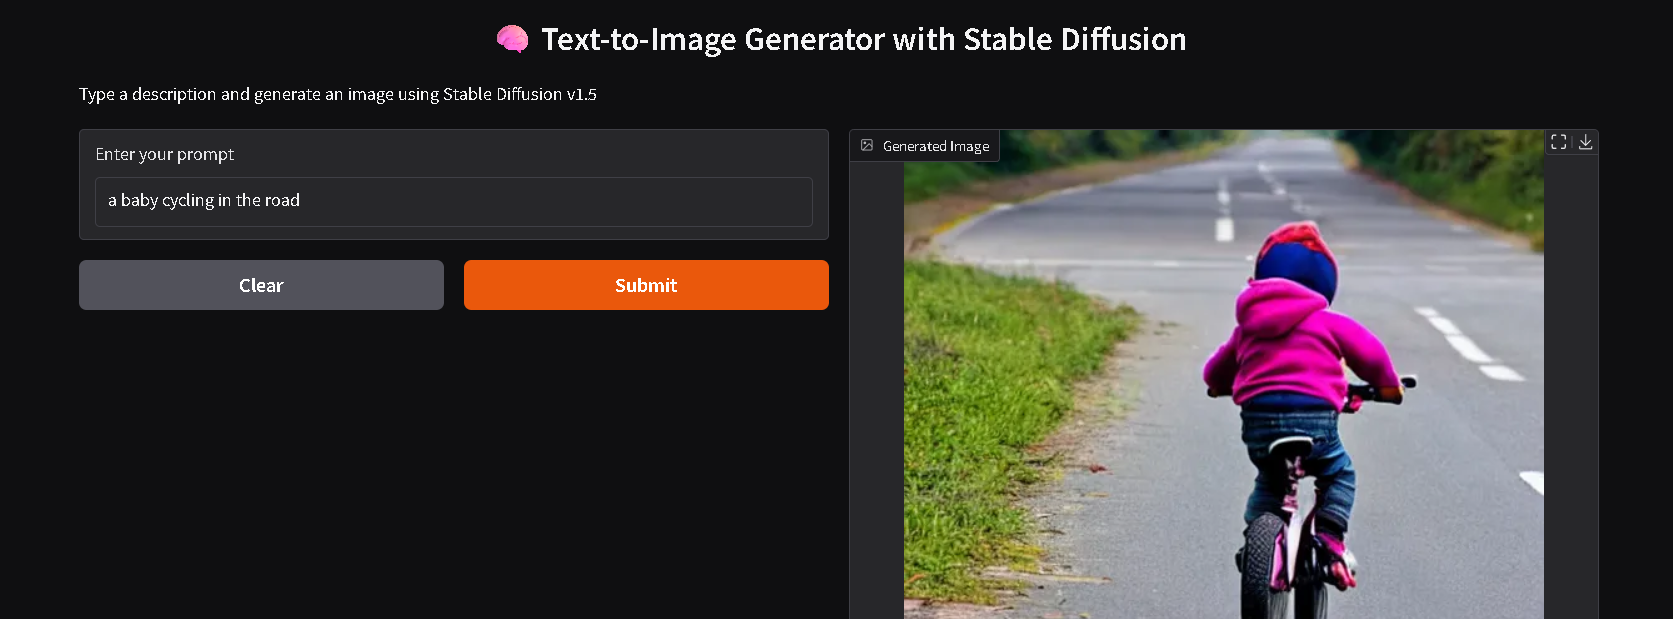

In [ ]:
# Import required libraries: PyTorch for GPU usage, Diffusers for Stable Diffusion pipeline,
# and DPMSolverMultistepScheduler for improved sampling (faster & better quality).
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# Choose the model ID (Stable Diffusion 2.1 from Stability AI)
model_id = "stabilityai/stable-diffusion-2-1"

# Load the Stable Diffusion pipeline in half-precision (fp16) for efficiency
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Replace the default scheduler with DPM-Solver++ for faster and higher-quality image generation
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Move the model to GPU for faster processing
pipe = pipe.to("cuda")

# Define the text prompt for the image
prompt = "a photo of an astronaut riding a horse on mars"

# Generate the image from the prompt
image = pipe(prompt).images[0]

# Save the generated image as a PNG file
image.save("astronaut_rides_horse.png")


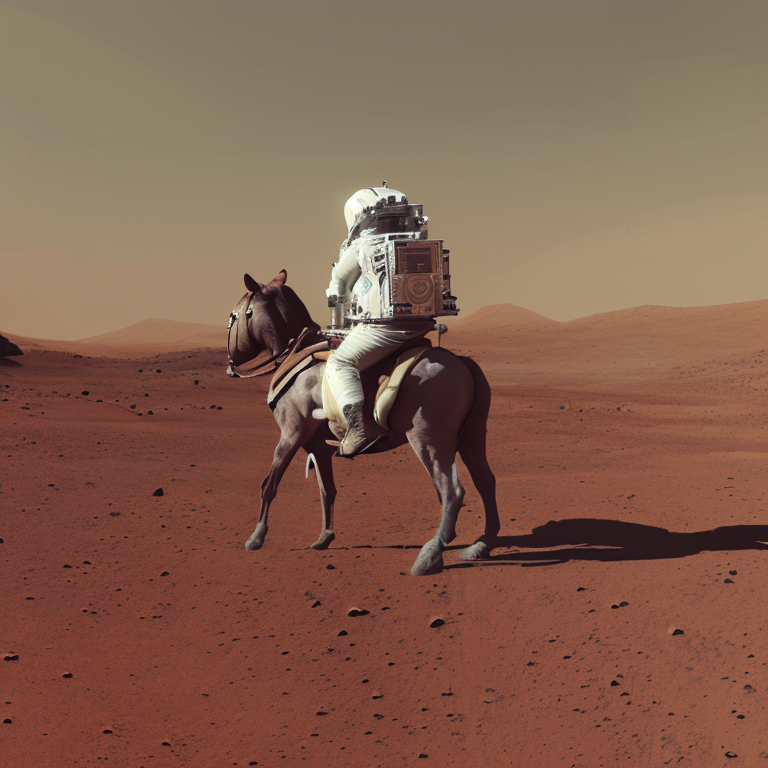

In [ ]:
from torch import autocast
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion v1.4 pipeline from Hugging Face with your authentication token
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    use_auth_token=True
).to("cuda")

# Define the text prompt for image generation
prompt = "panda image"

# Use autocast for mixed precision (fp16) on GPU to speed up inference and reduce memory usage
with autocast("cuda"):
    image = pipe(prompt)["images"][0]

# Save the generated image as a PNG file
image.save("panda.png")


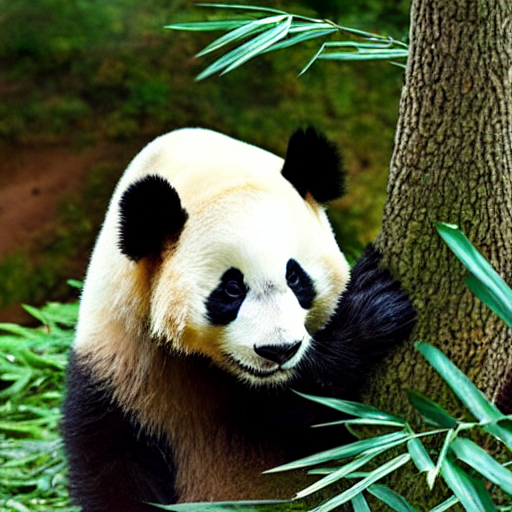

In [ ]:
# Import DiffusionPipeline from diffusers and PyTorch for GPU usage
from diffusers import DiffusionPipeline
import torch

# Load the Stable Diffusion XL base 1.0 model in half-precision (fp16) for efficiency
# Using safetensors format and specifying the fp16 variant
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# Move the pipeline to GPU for faster generation
pipe.to("cuda")

# Optional: Enable memory-efficient attention for torch versions < 2.0
# pipe.enable_xformers_memory_efficient_attention()

# Define the text prompt for image generation
prompt = "A beautiful girl selling pani puri on mars"

# Generate the image from the prompt
images = pipe(prompt=prompt).images[0]

# Save the generated image as a PNG file
images.save("girl.png")


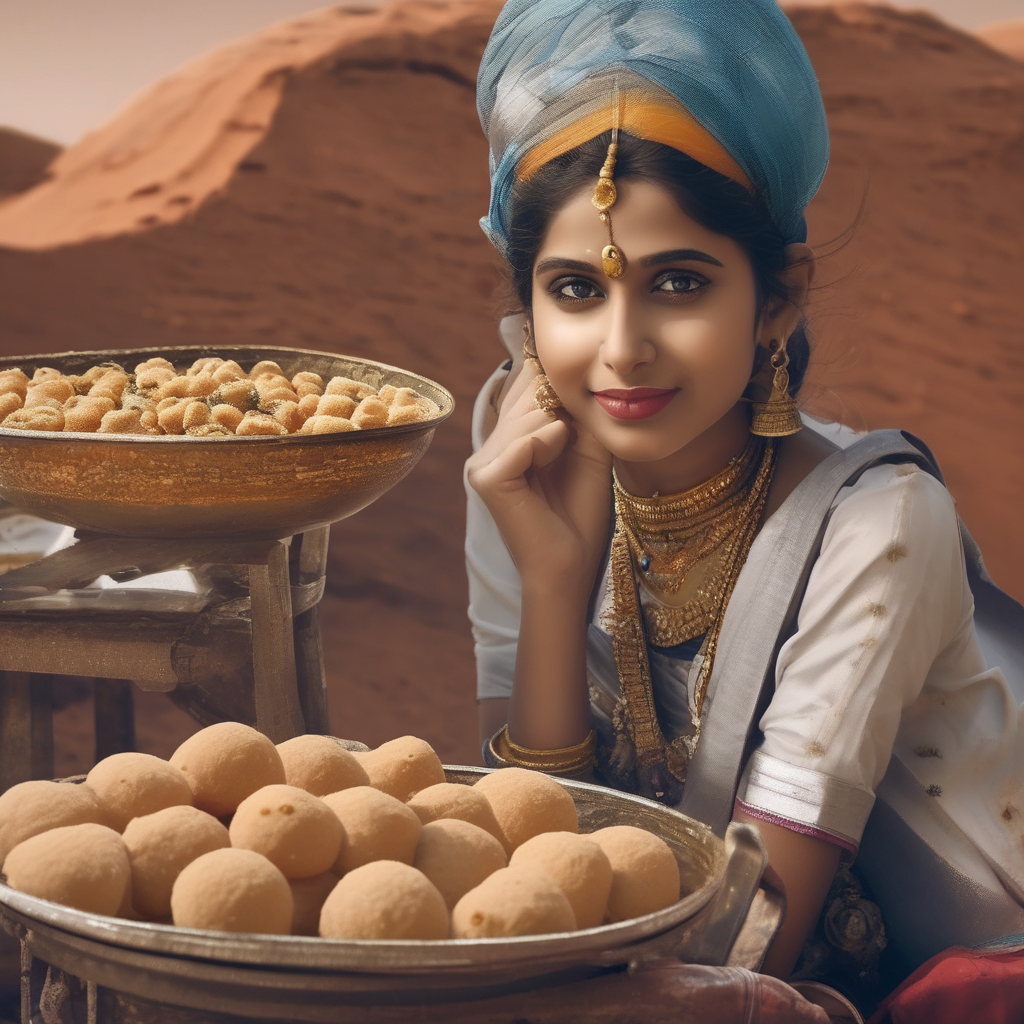

Text to audio

In [ ]:
# Import required libraries: PyTorch for GPU usage, soundfile for saving audio,
# and StableAudioPipeline from Diffusers for audio generation
import torch
import soundfile as sf
from diffusers import StableAudioPipeline

# Load the Stable Audio Open 1.0 pipeline in half-precision (fp16) for efficiency
pipe = StableAudioPipeline.from_pretrained(
    "stabilityai/stable-audio-open-1.0",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")  # Move the pipeline to GPU for faster generation

# Define the prompts
prompt = "baby crying with louder noise"  # Text describing the audio you want
negative_prompt = "Low quality."          # Things you want the model to avoid

# Set a fixed seed for reproducibility
generator = torch.Generator("cuda").manual_seed(0)

# Run audio generation
audio = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=200,       # Number of denoising steps (higher = better quality)
    audio_end_in_s=10.0,           # Duration of the generated audio in seconds
    num_waveforms_per_prompt=3,    # Generate multiple variations
    generator=generator
).audios

# Convert the generated audio tensor to numpy array and save it as a WAV file
output = audio[0].T.float().cpu().numpy()
sf.write("baby crying with louder noise.wav", output, pipe.vae.sampling_rate)


<audio controls src="baby crying with louder noise-1.wav" title="Title"></audio>

In [ ]:
!pip install svgpathtools
!pip install cairosvg
!pip install omegaconf
!pip install fairscale
!pip install deepspeed
!pip install flash-attn --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332208 sha256=2a37132294480bea8f2b31d172c84b14c1b61ee876bc43ff19d8e42a51dc85ed
  Stored in directory: /root/.cache/pip/wheels/5a/88/aa/d84b2cf1bad6b273cbf661640141a82c7b9f496e024f80aac0
Successfully built fairscale
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached 

In [ ]:
!git clone https://github.com/joanrod/star-vector.git

Cloning into 'star-vector'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 194 (delta 15), reused 8 (delta 8), pack-reused 170 (from 1)
Receiving objects: 100% (194/194), 6.44 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
%cd star-vector

/content/star-vector


In [ ]:
# Import required libraries
from PIL import Image
from svgpathtools import svgstr2paths
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoProcessor
from starvector.data.util import process_and_rasterize_svg
import torch

# Load the StarVector model for image-to-SVG conversion
model_name = "starvector/starvector-8b-im2svg"
starvector = AutoModelForCausalLM.from_pretrained(
    model_name,
    dtype=torch.float16,          # Use float16 for efficiency
    trust_remote_code=True,
    device_map="cuda"             # Load model on GPU
)

# Access the processor and tokenizer from the model
processor = starvector.model.processor
tokenizer = starvector.model.svg_transformer.tokenizer

# Set model to evaluation mode
starvector.eval()

# Load and preprocess input image
image_pil = Image.open('/content/tiger.jpg').convert("RGB")
image = processor(image_pil, return_tensors="pt")['pixel_values'].to("cuda")
if image.shape[0] != 1:
    image = image.unsqueeze(0)
batch = {"image": image}

# Generate SVG from image
with torch.no_grad():
    raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]

# Post-process SVG and generate raster image for preview
svg, raster_image = process_and_rasterize_svg(raw_svg)

# Save SVG and raster image
with open("output.svg", "w") as f:
    f.write(svg)
raster_image.save("output.png")

print("✅ Saved SVG as output.svg and raster image as output.png")

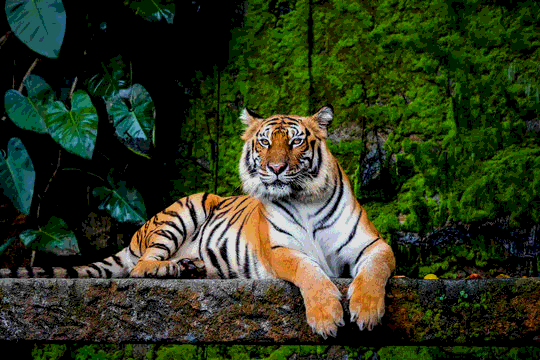

#**WAN** AI ( NEW SOTA MODEL)

In [ ]:
import torch
from diffusers import AutoencoderKLWan, WanPipeline
from diffusers.utils import export_to_video

# Load the Wan model and its VAE for text-to-video generation
model_id = "Wan-AI/Wan2.1-T2V-1.3B-Diffusers"
vae = AutoencoderKLWan.from_pretrained(model_id, subfolder="vae", torch_dtype=torch.bfloat16)
pipe = WanPipeline.from_pretrained(model_id, vae=vae, torch_dtype=torch.bfloat16)
pipe.to("cuda")  # Move pipeline to GPU

# Define prompts
prompt = "A Black Panther walks on the grass, realistic"
negative_prompt = (
    "Bright tones, overexposed, static, blurred details, subtitles, style, works, paintings, "
    "images, static, overall gray, worst quality, low quality, JPEG compression residue, ugly, "
    "incomplete, extra fingers, poorly drawn hands, poorly drawn faces, deformed, disfigured, "
    "misshapen limbs, fused fingers, still picture, messy background, three legs, many people in "
    "the background, walking backwards"
)

# Generate video frames
output = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    height=320,
    width=512,
    num_frames=24,
    guidance_scale=5.0
).frames

# Export frames to video
export_to_video(output, "output.mp4", fps=15)

![Screenshot 2025-09-27 212148.png](<attachment:Screenshot 2025-09-27 212148.png>)
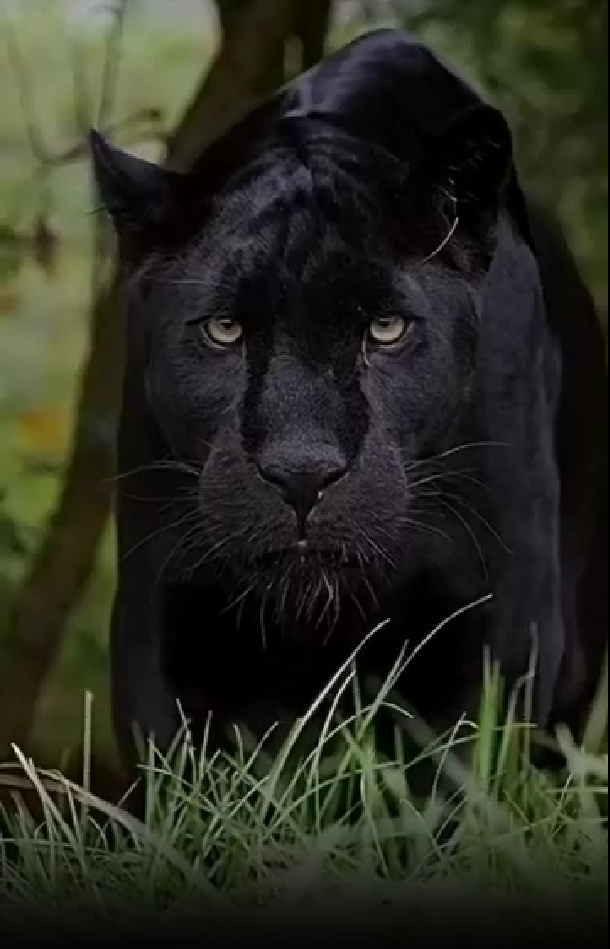

# Multilanguage Translator

In [1]:
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=6f2c52add9a523e5db1363fa9688cd0c8b65ce5ee0a0d4d9808a6b58b6ca07ef
  Stored in directory: /root/.cache/pip/wheels/96/ac/bd/9df9eab356c0576896e97147425987f6f45e9e46456c978d18
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperframe

In [2]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2

In [ ]:
from googletrans import Translator  # Make sure googletrans is installed

def get_translation(text, dest_lang):
    """
    Translate a given text to the target language.

    Args:
        text (str): Text to translate.
        dest_lang (str): Target language code (e.g., 'bn' for Bengali, 'fr' for French).

    Returns:
        str: Translated text.
    """
    translator = Translator()  # Initialize translator
    translated_text = translator.translate(text, dest=dest_lang)  # Translate text
    return translated_text.text  # Return the translated string


In [ ]:
import torch

class CFG:
    """
    Configuration class for controlling device, random seed, 
    and model parameters for image and prompt generation.
    """
    
    # Device and random seed
    device = "cuda"
    seed = 42

    # Initialize generator with seed for reproducibility
    try:
        generator = torch.Generator(device).manual_seed(seed)
    except Exception as e:
        print(f"Error initializing GPU generator: {e}")
        device = "cpu"
        generator = torch.Generator(device).manual_seed(seed)

    # Image generation settings
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2-1"
    image_gen_size = (900, 900)  # (height, width)
    image_gen_guidance_scale = 9

    # Prompt generation settings
    prompt_gen_model_id = "gpt-omni/mini-omni"
    prompt_dataset_size = 6
    prompt_max_length = 12  # Fixed typo from 'prompt_max_lenghth'


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion model for image generation
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id,       # Model ID from configuration
    torch_dtype=torch.float16,    # Use half precision for efficiency
    revision='fp16',              # Load fp16 weights
    use_auth_token='',            # Optional: your Hugging Face token if required
    guidance_scale=9              # Default guidance scale for generation
)

# Move model to device specified in CFG (GPU or CPU)
image_gen_model = image_gen_model.to(CFG.device)


In [ ]:
def generate_image(prompt, model):
    """
    Generate an image from a text prompt using a Stable Diffusion model.

    Args:
        prompt (str): The text prompt describing the desired image.
        model: A Stable Diffusion pipeline model.

    Returns:
        PIL.Image: Generated image resized to CFG.image_gen_size.
    """
    # Generate the image
    image = model(
        prompt,
        num_inference_steps=CFG.image_gen_steps,      # Number of denoising steps
        generator=CFG.generator,                      # For reproducibility
        guidance_scale=CFG.image_gen_guidance_scale   # Strength of prompt guidance
    ).images[0]

    # Resize the generated image to desired dimensions
    image = image.resize(CFG.image_gen_size)
    return image


In [ ]:
# Translate Bengali text to English
translation = get_translation("মিকি মাউস মাঠে নাচছে", "en")
print(f"Translated prompt: {translation}")

# Generate image from the translated prompt
image = generate_image(translation, image_gen_model)

# Optionally, display or save the generated image
image.show()             # Display in a window
image.save("mickey.png") # Save locally

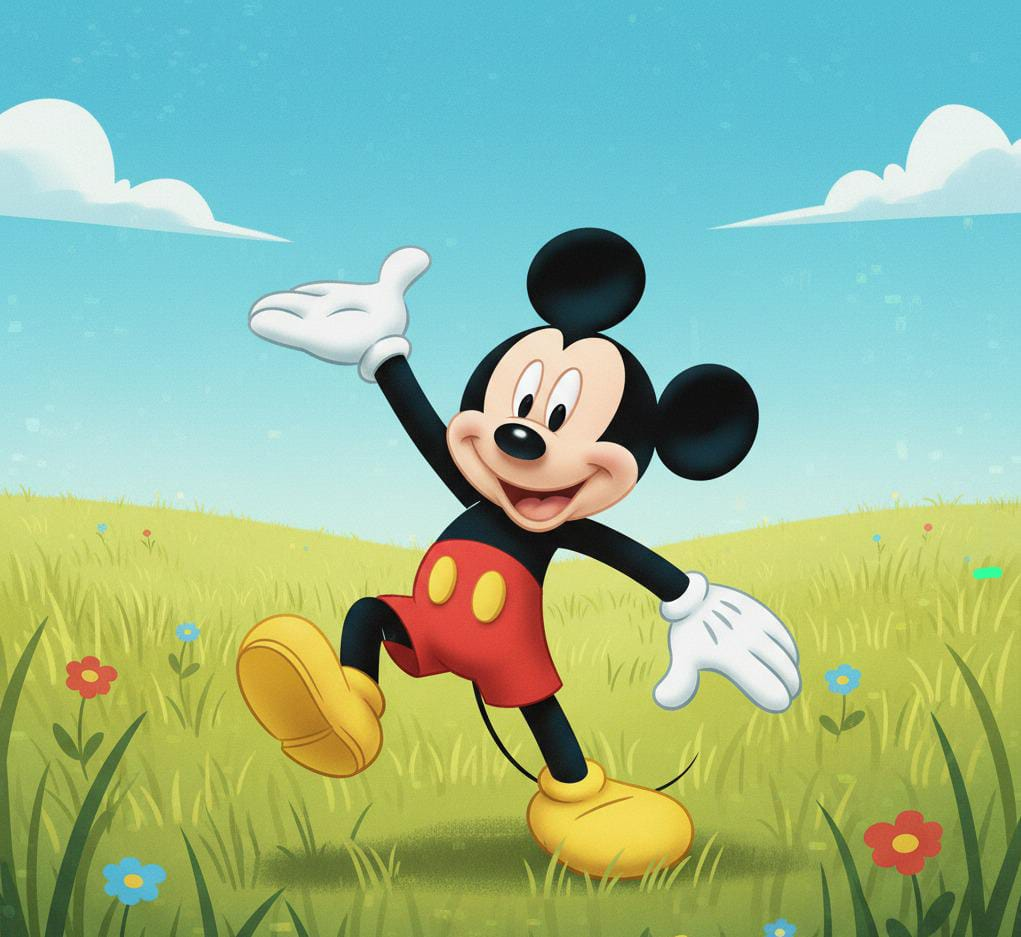

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Model and device configuration
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"  # Use GPU if available

# Load the Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16  # Use half precision for efficiency
)
pipe = pipe.to(device)  # Move model to GPU

# Define prompt and generate image
prompt = "a deer jumping in the moon"
image = pipe(prompt).images[0]  # Generate the first image

# Save the generated image
image.save("deer.png")
print("✅ Image saved as deer.png")

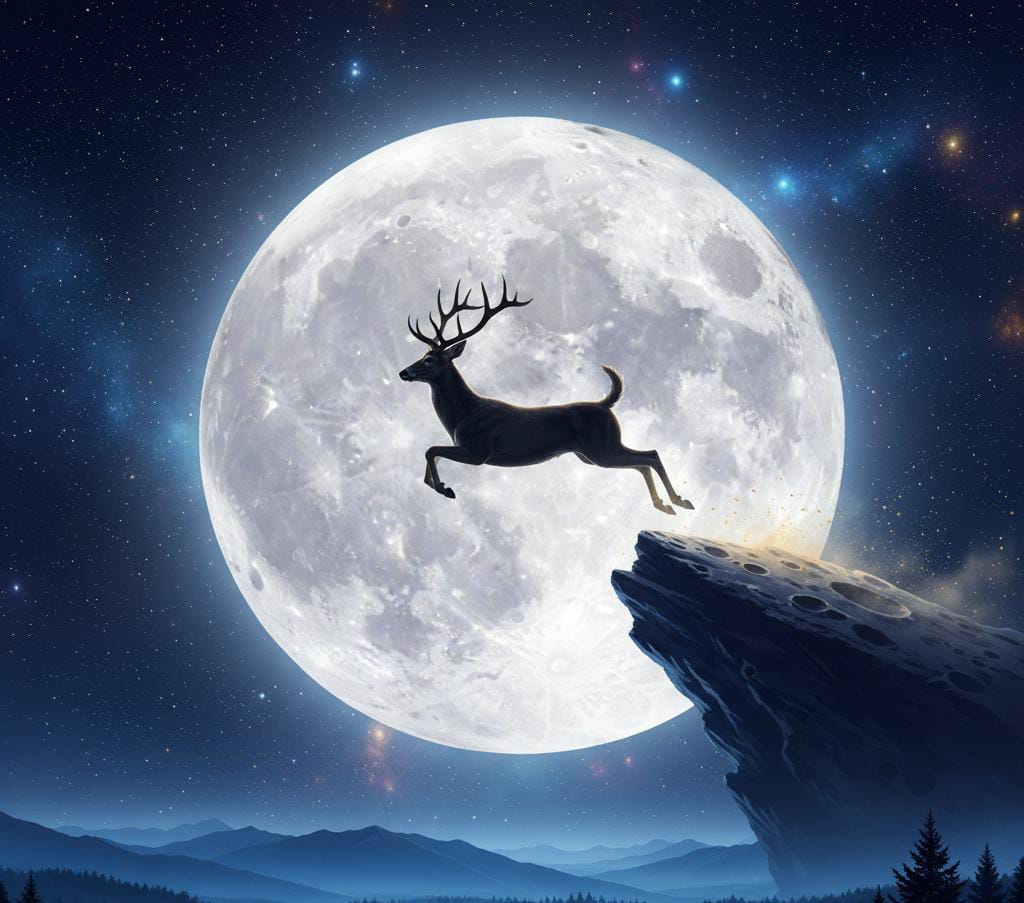

# Ghibli style image using Ghibli diffusion model by stable diffusion

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Model and device configuration
model_id = "nitrosocke/Ghibli-Diffusion"
device = "cuda"  # Use GPU if available

# Load the Ghibli-style Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16  # Use half precision for efficiency
)
pipe = pipe.to(device)  # Move model to GPU

# Define prompt and generate image
prompt = "ghibli style magical tiger with feather fly in jungle"
image = pipe(prompt).images[0]  # Generate the first image

# Save the generated image
image.save("tiger.png")
print("✅ Image saved as tiger.png")


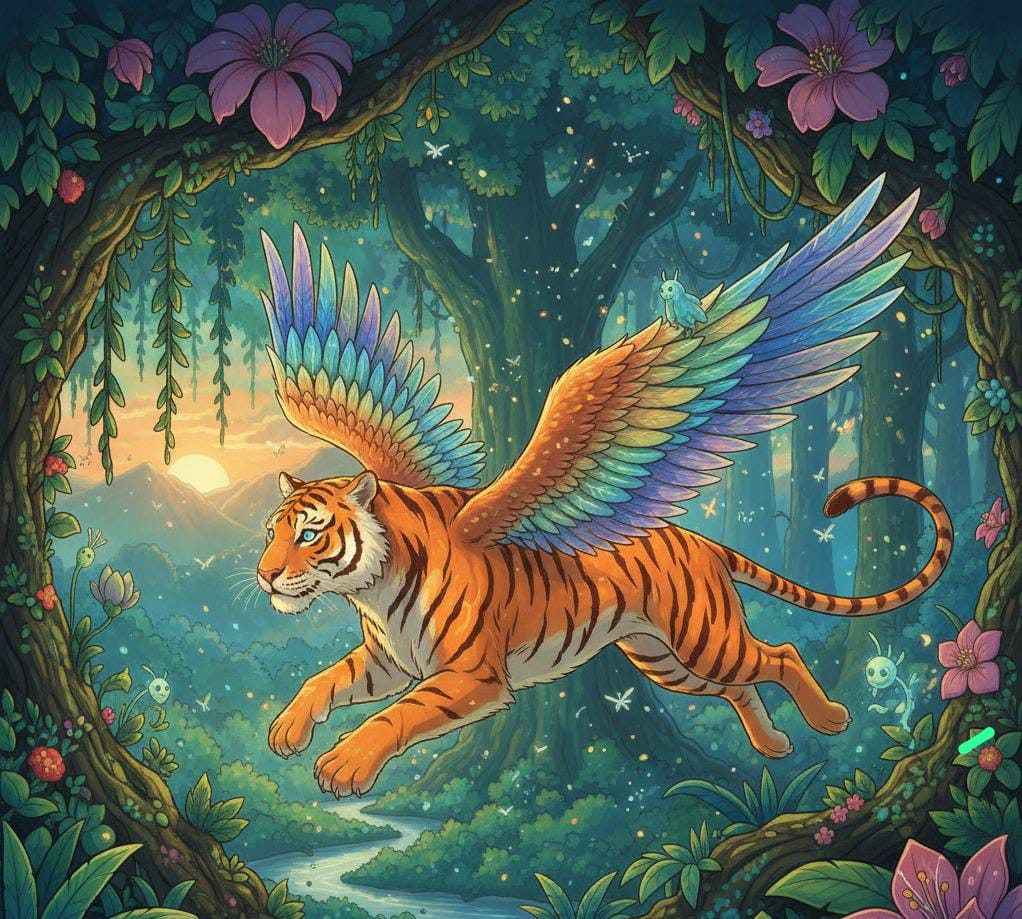